# Preporcessing of UrbanSound8K dataset to build a Convolutional Neural Network

The goal of this project is to build a convolutional neural network to classify audio files from the UrbanSound8k dataset.

This dataset contains audio divided in ten classes, each one representing a different type of city sound as air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, and street_music.

This notebook presents the the original dataset structure and the steps followed to create training and test sets from it.



**Task Details**
    
* [1. Perform grayscale transformation, resizing and normalization](#section-one)
* [2. Creating the train and test datasets](#section-two)
* [3.  Saving the datasets](#section-three)

<a id="section-one"></a>
## **1. Performing grayscale transformation, resizing and normalization**   


### **Importing the required libraries**
We'll start with importing required libraries.

In [1]:
# Import Numpy and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/Users/Workstation/PycharmProjects/VBO1/AIHub/Proje/UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


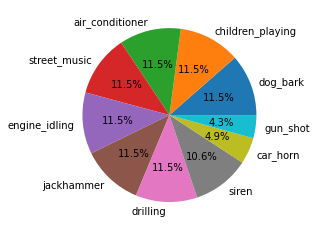

In [3]:
Class_info=data['class'].value_counts()
plt.pie(Class_info,labels=Class_info.index,autopct="%1.1f%%")
plt.show()

Adding images to a list with their tags will also be covered in this section

In [11]:
imgs= []
labels= []

In [12]:
import cv2

import os,glob

from os import listdir,makedirs

from os.path import isfile,join
path = '/Users/Workstation/PycharmProjects/VBO1/AIHub/Proje/spectrograms' # Source Folder
dstpath = '/Users/Workstation/PycharmProjects/VBO1/AIHub/Proje/spectrograms_gray' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")
# Folder won't used
files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_gray = cv2.resize(gray, (100, 100), interpolation = cv2.INTER_AREA)

        #Since pixel values are between 0 and 255, dividing these values by 255 will scale each of them to values 
        #between 0 and 1
        normalized_gray=resized_gray/255
        imgs.append(normalized_gray)
        
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,resized_gray)

    except:
        print ("{} is not converted".format(image))
        
        '''
for fil in glob.glob("*.jpg"):
    try:
        image = cv2.imread(fil) 
        gray_image = cv2.cvtColor(os.path.join(path,image), cv2.COLOR_BGR2GRAY) # convert to greyscale
        cv2.imwrite(os.path.join(dstpath,fil),gray_image)
    except:
        print('{} is not converted')
        '''

Directory already exist, images will be written in same folder


In [19]:
imgs

[array([[0.98431373, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.98823529, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.98823529, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.98823529, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.98823529, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
         0.06666667],
        [1.        , 0.98823529, 0.98823529, ..., 0.98823529, 0.98823529,
         0.98823529]]),
 array([[0.98431373, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.98823529, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.98823529, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.98823529, 0.47843137, 0.62745098, ..., 0.76470588, 0.74901961,
         0.57647059],
        [0.9

In [16]:
for fold in range(1,11):
  fold_iter='/Users/Workstation/PycharmProjects/VBO1/AIHub/Proje/spectrograms_gray'

  for ses_dosyasi in os.listdir(fold_iter):
        ses_etiket=ses_dosyasi.split("-")[1]
        labels.append(ses_etiket)

In [20]:
labels

['3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '6',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8'

<a id="section-two"></a>
## 2. Creating the train and test datasets

In [21]:
def train_valid_test(imgs, labels, train_percentage = 0.8, valid_percentage = 0.1):
  size=len(imgs)

  X_train=imgs[:int(train_percentage*size)]
  X_val=imgs[int(train_percentage*size):int((train_percentage+valid_percentage)*size)]
  X_test=imgs[int((train_percentage+valid_percentage)*size):]

  y_train=labels[:int(train_percentage*size)]
  y_val=labels[int(train_percentage*size):int((train_percentage+valid_percentage)*size)]
  y_test=labels[int((train_percentage+valid_percentage)*size):]

  return X_train, y_train, X_val, y_val, X_test, y_test

In [24]:
import random
dict_ = list(zip(imgs, labels))
random.seed(42)
random.shuffle(dict_)
imgs, labels = zip(*dict_)

imgs=np.array(imgs)
labels=np.array(labels)

In [25]:
X_train, y_train, X_val, y_val, X_test, y_test= train_valid_test(imgs, labels)

In [26]:
print("train Shape:", X_train.shape)
print("Valid Shape:", X_val.shape)
print("Test Shape:", X_test.shape)

train Shape: (6985, 100, 100)
Valid Shape: (873, 100, 100)
Test Shape: (874, 100, 100)


<a id="section-three"></a>
## 3.  Saving the datasets

In [28]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
x_test_2d=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
x_val_2d=np.reshape(X_val,(X_val.shape[0],X_val.shape[1]*X_val.shape[2]))
x_train_2d.shape,x_test_2d.shape,x_val_2d.shape

((6985, 10000), (874, 10000), (873, 10000))

In [38]:
np.savetxt("X_train.csv", x_train_2d, delimiter=",")
np.savetxt("X_test.csv",x_test_2d,delimiter=",")
np.savetxt("X_val.csv", x_val_2d, delimiter=",")

np.savetxt("y_train.csv",y_train,delimiter=",",fmt='%s')
np.savetxt("y_test.csv",y_test,delimiter=",",fmt='%s')
np.savetxt("y_val.csv",y_val,delimiter=",",fmt='%s')

